Датасет взят с кэгла. Задача классификации, определить пойдет завтра дождь или нет

https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

In [94]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import catboost as catb
from sklearn.metrics import recall_score, precision_score, roc_auc_score, accuracy_score, f1_score

In [95]:
data = pd.read_csv('weatherAUS.csv', sep=',')
data.head(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No


In [96]:
df_test = data.loc[data['RainTomorrow'].isna()]
df_test.head(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
14,2008-12-15,Albury,8.4,24.6,0.0,NaN,NaN,NaN,NaN,S,...,57.0,32.0,1009.7,1008.7,NaN,NaN,15.9,23.5,No,NaN
283,2009-09-10,Albury,2.6,NaN,0.0,NaN,NaN,NaN,NaN,E,...,71.0,55.0,1017.8,1017.6,NaN,6.0,9.7,14.3,No,NaN
435,2010-02-09,Albury,22.1,35.1,0.0,NaN,NaN,NaN,NaN,ENE,...,58.0,37.0,1020.9,1017.8,NaN,1.0,26.9,33.5,No,NaN


In [97]:
data.loc[~data['RainTomorrow'].isna()]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No


In [98]:
df = data.loc[~data['RainTomorrow'].isna()]
df.head(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No


In [99]:
df.shape, df_test.shape

((142193, 23), (3267, 23))

In [100]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


In [101]:
# Посомтрим на пропуски

df.isna().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

In [102]:
# Посмотрим на типы данных в датасете

df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [103]:
target_name = 'RainTomorrow'
base_feature_names = df.columns.drop([target_name]).tolist()
cat_feature_names = df.select_dtypes(include='object').columns.drop([target_name]).tolist()
num_feature_names = df.columns.drop([target_name] + cat_feature_names).tolist()

In [104]:
df['RainTomorrow'].unique()

array(['No', 'Yes'], dtype=object)

In [105]:
# преобразуем target

df.loc[df['RainTomorrow'] == 'No', 'RainTomorrow'] = 0
df.loc[df['RainTomorrow'] == 'Yes', 'RainTomorrow'] = 1


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [106]:
df['RainTomorrow'].unique()

array([0, 1], dtype=object)

In [107]:
# поменяем тип данных

df = df.astype({"RainTomorrow": int})

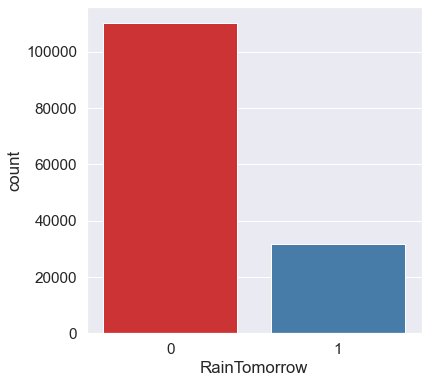

In [108]:
#Посмотрим на соотношение классов 

f, ax = plt.subplots(figsize=(6, 6))
ax = sns.countplot(x="RainTomorrow", data=df, palette="Set1")
plt.show()

In [109]:
#Посмотрим на соотношение классов в численном выражении

df['RainTomorrow'].value_counts()

0    110316
1     31877
Name: RainTomorrow, dtype: int64

### Корреляция целевой переменной с базовыми признаками

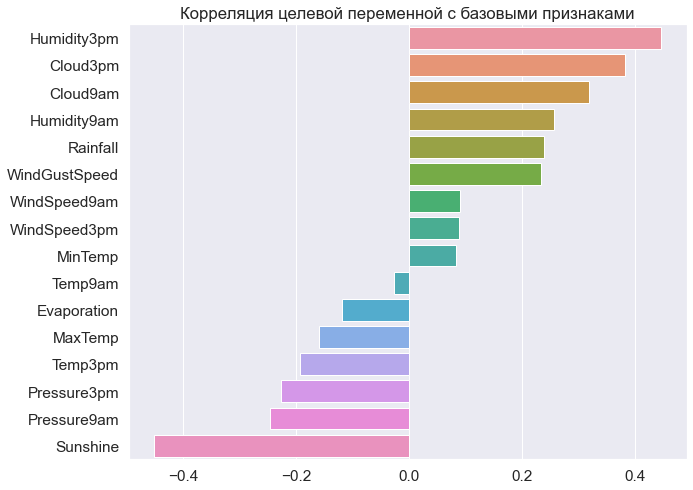

In [110]:
corr_with_target = df[base_feature_names + [target_name]].corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 8))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Корреляция целевой переменной с базовыми признаками')
plt.show()

### Матрица корреляций признаков

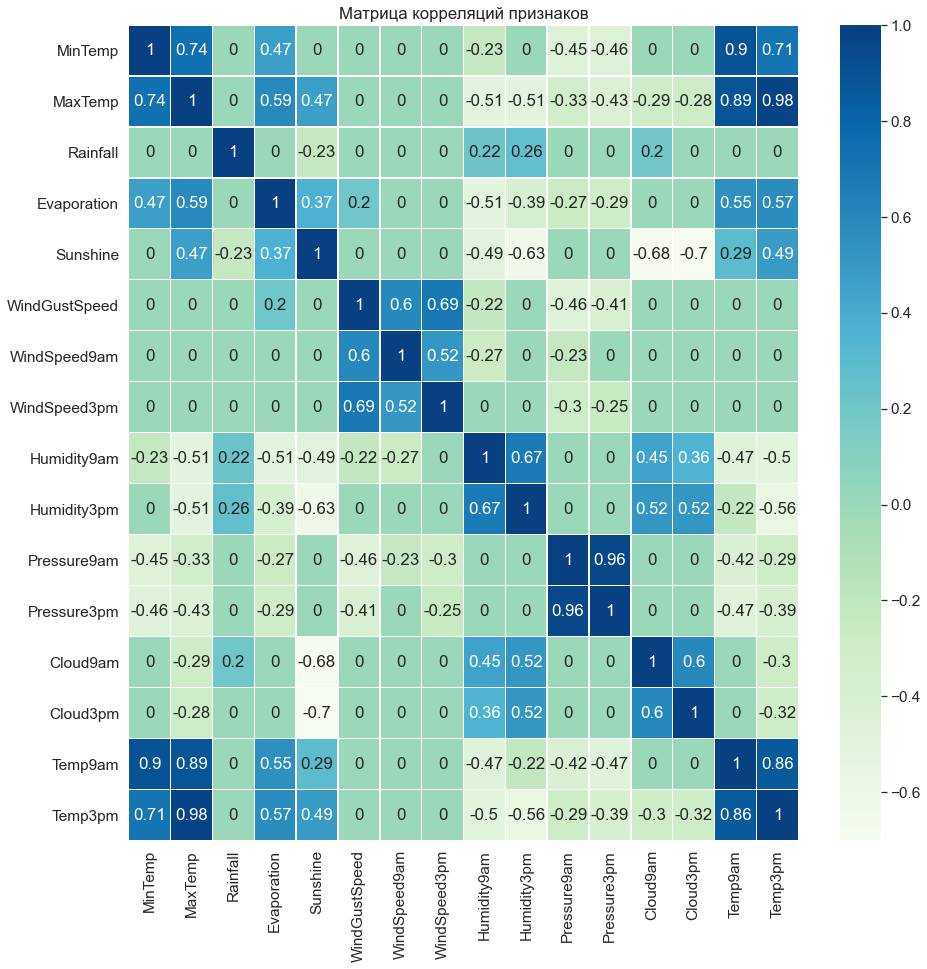

In [111]:
plt.figure(figsize = (15,15))

sns.set(font_scale=1.4)

corr_matrix = df[base_feature_names].corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.2] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='GnBu')

plt.title('Матрица корреляций признаков')
plt.show()

### Анализ выбросов

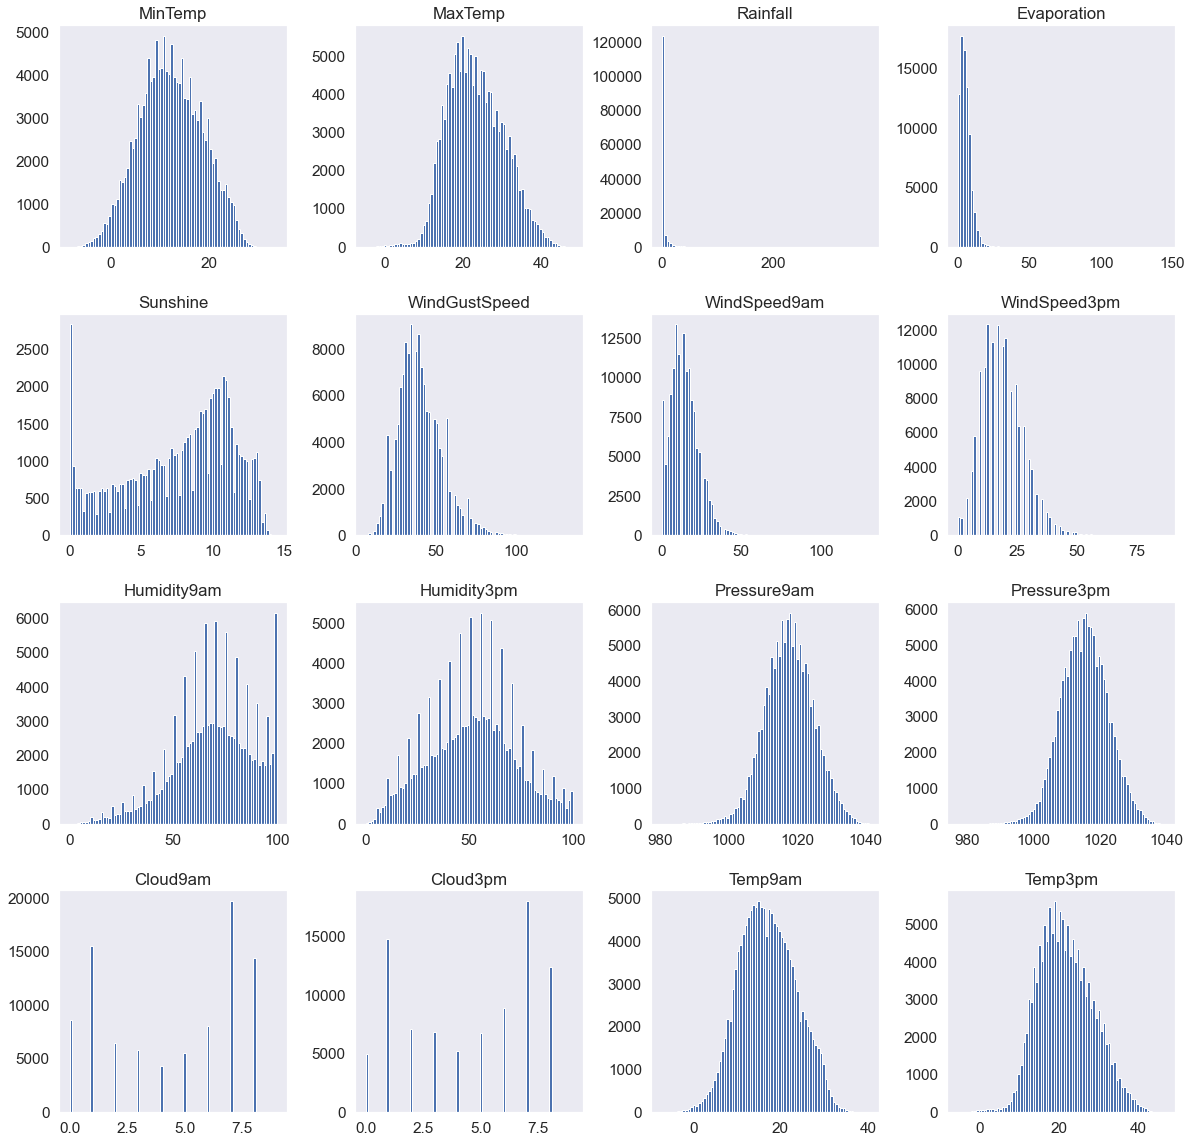

In [24]:
df[num_feature_names].hist(figsize=(20, 20), bins=80, grid=False);

In [25]:
# посомтрим на сводную статистику в числовых переменных

print(round(df[num_feature_names].describe()),2)

        MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  141556.0  141871.0  140787.0      81350.0   74377.0       132923.0   
mean       12.0      23.0       2.0          5.0       8.0           40.0   
std         6.0       7.0       8.0          4.0       4.0           14.0   
min        -8.0      -5.0       0.0          0.0       0.0            6.0   
25%         8.0      18.0       0.0          3.0       5.0           31.0   
50%        12.0      23.0       0.0          5.0       8.0           39.0   
75%        17.0      28.0       1.0          7.0      11.0           48.0   
max        34.0      48.0     371.0        145.0      14.0          135.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count      140845.0      139563.0     140419.0     138583.0     128179.0   
mean           14.0          19.0         69.0         51.0       1018.0   
std             9.0           9.0         19.0         21.0          7.0   
mi

In [26]:
# обработаем пропущенные значения числовых признаков в X_train

for col in df[num_feature_names]:
    col_median = df[col].median()
    df[col].fillna(col_median, inplace=True) 

In [27]:
# проверим наличие пропусков еще раз X_train

df[num_feature_names].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [28]:
# проверка количества элементов в категориальных переменных

for var in cat_feature_names:
    
    print(var, ' содержит ', len(df[var].unique()), ' labels')

Date  содержит  3436  labels
Location  содержит  49  labels
WindGustDir  содержит  17  labels
WindDir9am  содержит  17  labels
WindDir3pm  содержит  17  labels
RainToday  содержит  3  labels


In [29]:
# обработаем признак RainToday

df['RainToday'].fillna(df['RainToday'].mode()[0], inplace=True)

# переведем признак RainToday в числовой
df.loc[df['RainToday'] == 'No', 'RainToday'] = 0
df.loc[df['RainToday'] == 'Yes', 'RainToday'] = 1
df['RainToday'].unique()
df = df.astype({"RainToday": int})

Мы видим, что есть переменная Date, которую нужно предварительно обработать. Предварительную обработку сделаем позже.

In [30]:
# приведем фичу Date к нормальному формату даты 

df['Date'] = pd.to_datetime(df['Date'])

In [31]:
# извлечь год, месяц и день из числа

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [32]:
# удалим столбец Date

df.drop('Date', axis=1, inplace = True)

In [33]:
df.head(3)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,4.8,8.5,W,44.0,W,WNW,...,1007.1,8.0,5.0,16.9,21.8,0,0,2008,12,1
1,Albury,7.4,25.1,0.0,4.8,8.5,WNW,44.0,NNW,WSW,...,1007.8,5.0,5.0,17.2,24.3,0,0,2008,12,2
2,Albury,12.9,25.7,0.0,4.8,8.5,WSW,46.0,W,WSW,...,1008.7,5.0,2.0,21.0,23.2,0,0,2008,12,3


In [34]:
df.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday          int32
RainTomorrow       int32
Year               int64
Month              int64
Day                int64
dtype: object

In [35]:
# Обновим наши список наших категориальных фичей, чтобы в нем не было даты, которая была типом "object"
cat_feature_names = df.select_dtypes(include='object').columns.tolist()
cat_feature_names

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

In [36]:
# вывести процент пропущенных значений в категориальных переменных в X_train

df[cat_feature_names].isnull().mean()

Location       0.000000
WindGustDir    0.065615
WindDir9am     0.070418
WindDir3pm     0.026570
dtype: float64

In [37]:
# присвоим отсутствующим категориальным переменным наиболее частое значение

df['WindGustDir'].fillna(df['WindGustDir'].mode()[0], inplace=True)
df['WindDir9am'].fillna(df['WindDir9am'].mode()[0], inplace=True)
df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0], inplace=True)

In [38]:
#кодируем все категориальные признаки с помощью get_dummies
df = pd.get_dummies(df, columns = cat_feature_names, prefix_sep = "_", drop_first = True) 

In [39]:
X = df.drop(columns=target_name)
y = df[target_name]

In [40]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

In [41]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((99535, 113), (42658, 113), (99535,), (42658,))

In [55]:
catb_model = catb.CatBoostClassifier(
    random_state=42,  
    n_estimators=1200, 
    learning_rate=0.025,
)

catb_model.fit(X_train, y_train)
y_predict = catb_model.predict(X_valid)

0:	learn: 0.6746431	total: 20.5ms	remaining: 24.6s
1:	learn: 0.6575133	total: 41ms	remaining: 24.6s
2:	learn: 0.6409602	total: 60.1ms	remaining: 24s
3:	learn: 0.6253139	total: 79.7ms	remaining: 23.8s
4:	learn: 0.6114262	total: 102ms	remaining: 24.4s
5:	learn: 0.5977598	total: 121ms	remaining: 24.2s
6:	learn: 0.5850834	total: 143ms	remaining: 24.3s
7:	learn: 0.5737274	total: 164ms	remaining: 24.5s
8:	learn: 0.5629014	total: 186ms	remaining: 24.7s
9:	learn: 0.5526471	total: 207ms	remaining: 24.6s
10:	learn: 0.5431766	total: 232ms	remaining: 25s
11:	learn: 0.5333279	total: 255ms	remaining: 25.2s
12:	learn: 0.5246043	total: 274ms	remaining: 25s
13:	learn: 0.5158059	total: 293ms	remaining: 24.9s
14:	learn: 0.5080916	total: 316ms	remaining: 25s
15:	learn: 0.5005550	total: 337ms	remaining: 24.9s
16:	learn: 0.4929785	total: 359ms	remaining: 25s
17:	learn: 0.4865398	total: 380ms	remaining: 24.9s
18:	learn: 0.4805459	total: 402ms	remaining: 25s
19:	learn: 0.4746367	total: 425ms	remaining: 25.1s


In [58]:
# посмоттрим на метрики

results = {}

def evaluate_results(y_valid, y_predict):

    f1 = f1_score(y_valid, y_predict)
    roc = roc_auc_score(y_valid, y_predict)
    rec = recall_score(y_valid, y_predict, average='binary')
    prc = precision_score(y_valid, y_predict, average='binary')
    results = {'metric': ['f1_score', 'roc_auc_score', 'recall', 'precision'],
               'catboost_model': [f1, roc, rec, prc],
              }

    return results

In [61]:
models_results = evaluate_results(y_valid, y_predict)
result_df = pd.DataFrame(models_results)
result_df

,metric,catboost_model
0,f1_score,0.633779
1,roc_auc_score,0.746328
2,recall,0.539528
3,precision,0.767932
